<a href="https://colab.research.google.com/github/jennyaaz/miniprojectdataset/blob/main/Dataset_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Memuat dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [ ]:
# Analisis Struktur Data
print("Struktur Data:")
print(df.head())

Struktur Data:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \

In [ ]:
# Mengecek nilai yang hilang
print("Cek Nilai Hilang:")
print(df.isnull().sum())

Cek Nilai Hilang:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [ ]:
# Jumlah nilai unik per fitur
print("Jumlah Nilai Unik per Fitur:")
print(df.nunique())

Jumlah Nilai Unik per Fitur:
mean radius                456
mean texture               479
mean perimeter             522
mean area                  539
mean smoothness            474
mean compactness           537
mean concavity             537
mean concave points        542
mean symmetry              432
mean fractal dimension     499
radius error               540
texture error              519
perimeter error            533
area error                 528
smoothness error           547
compactness error          541
concavity error            533
concave points error       507
symmetry error             498
fractal dimension error    545
worst radius               457
worst texture              511
worst perimeter            514
worst area                 544
worst smoothness           411
worst compactness          529
worst concavity            539
worst concave points       492
worst symmetry             500
worst fractal dimension    535
target                       2
dtype: int

In [ ]:
# Statistik deskriptif
print("Statistik Data:")
print(df.describe())

Statistik Data:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000

In [ ]:
# Distribusi kelas
print("Distribusi Kelas:")
print(df['target'].value_counts())

Distribusi Kelas:
target
1    357
0    212
Name: count, dtype: int64


In [ ]:
# Matriks Korelasi
print("Matriks Korelasi:")
print(df.corr())

Matriks Korelasi:
                         mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture er

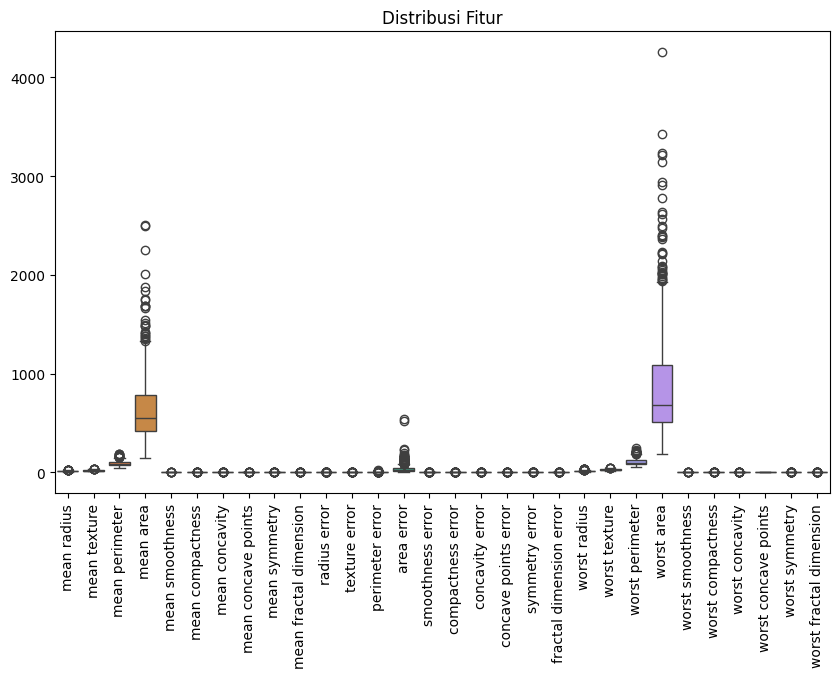

In [ ]:
# Visualisasi distribusi fitur dengan boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=['target']))
plt.xticks(rotation=90)
plt.title("Distribusi Fitur")
plt.show()

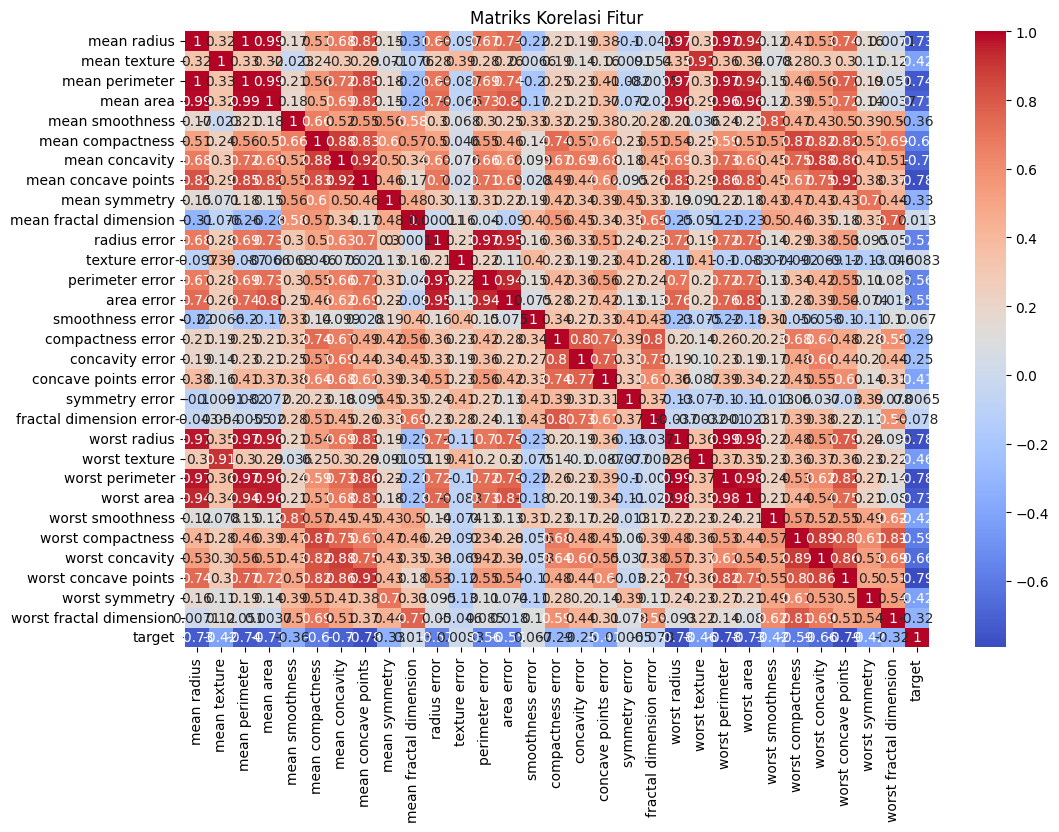

In [ ]:
# Heatmap Korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi Fitur")
plt.show()

In [ ]:
# Memisahkan fitur dan target
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standarisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

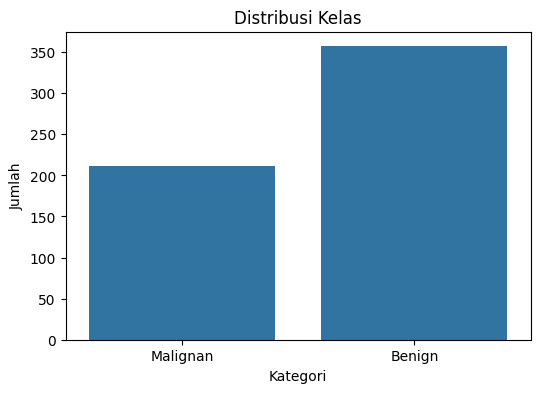

In [ ]:
# Visualisasi distribusi kelas
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.xticks(ticks=[0, 1], labels=['Malignan', 'Benign'])
plt.title('Distribusi Kelas')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
# Fitur menggunakan Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

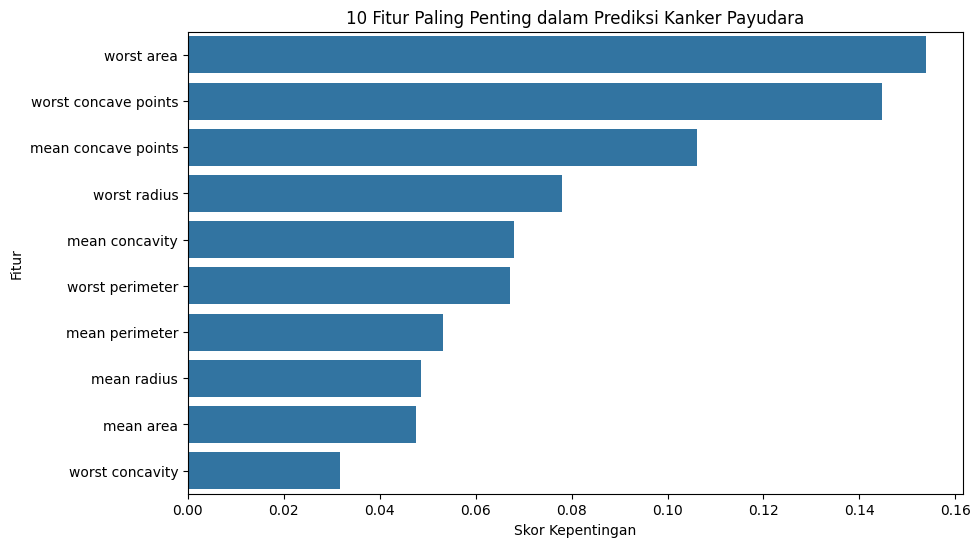

In [ ]:
# Plotting fitur
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10])
plt.title("10 Fitur Paling Penting dalam Prediksi Kanker Payudara")
plt.xlabel("Skor Kepentingan")
plt.ylabel("Fitur")
plt.show()

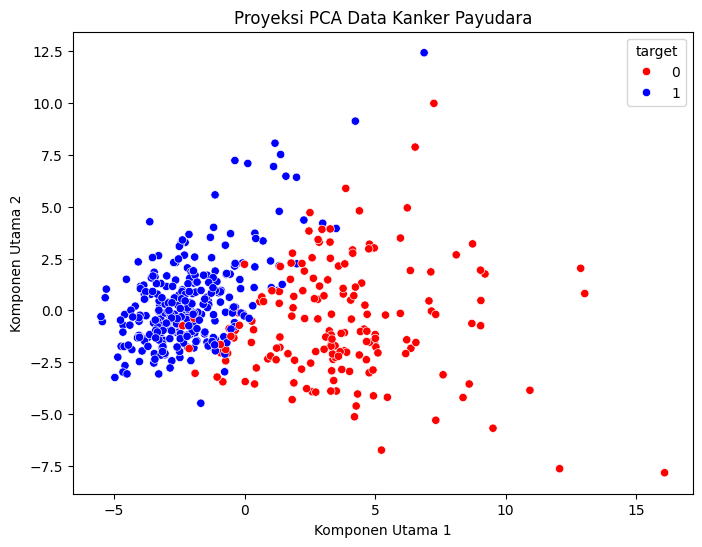

In [ ]:
# PCA untuk visualisasi pengurangan dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train, palette=['red', 'blue'])
plt.title("Proyeksi PCA Data Kanker Payudara")
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.show()

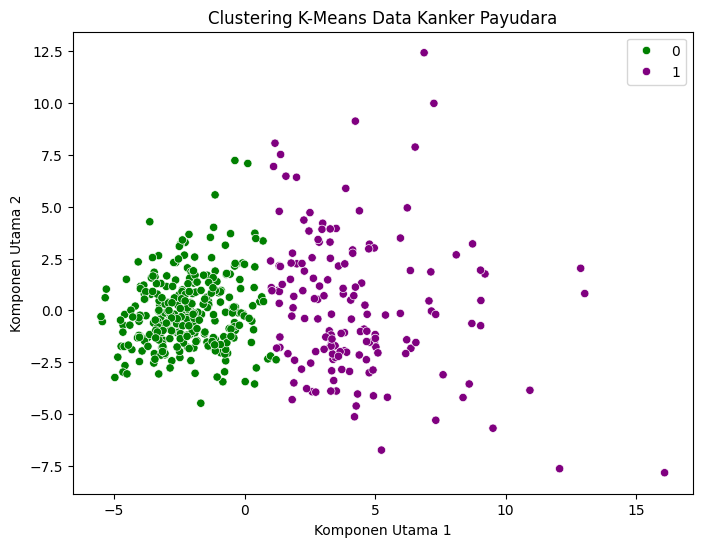

In [ ]:
# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_train_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette=['green', 'purple'])
plt.title("Clustering K-Means Data Kanker Payudara")
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.show()

In [ ]:
# Pelatihan model dengan Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [ ]:
# Evaluasi model
print("Akurasi Model (Random Forest):", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))

Akurasi Model (Random Forest): 0.9649122807017544
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



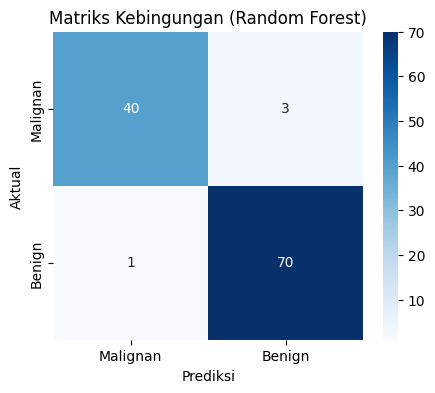

In [ ]:
# Matriks Kebingungan untuk Random Forest
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Malignan', 'Benign'], yticklabels=['Malignan', 'Benign'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Matriks Kebingungan (Random Forest)')
plt.show()

In [ ]:
# Prediksi kelangsungan hidup menggunakan Logistic Regression (Simulasi)
np.random.seed(42)
survival_labels = np.random.randint(0, 2, size=len(y_train))
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled[:, :5], survival_labels)
survival_preds = log_reg.predict(X_test_scaled[:, :5])
print("Akurasi Prediksi Kelangsungan Hidup (Logistic Regression):", accuracy_score(survival_labels[:len(y_test)], survival_preds))
print(classification_report(survival_labels[:len(y_test)], survival_preds))

Akurasi Prediksi Kelangsungan Hidup (Logistic Regression): 0.49122807017543857
              precision    recall  f1-score   support

           0       0.34      0.26      0.29        47
           1       0.56      0.66      0.60        67

    accuracy                           0.49       114
   macro avg       0.45      0.46      0.45       114
weighted avg       0.47      0.49      0.47       114

